# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Target website URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URLs
query_url = f"{url}q="
units_url = f"&units=imperial"
appid_url = f"&appid={weather_api_key}"

# set up lists to hold reponse info
loc = []
lat = []
lng = []
temp_max = []
humid = []
cloud = []
wind = []
country = []
date = []

# Capitalizing cities for appropriate reference
cities = [x.title() for x in cities]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city + units_url + appid_url).json()
        loc.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_ID = (response['id'])
        print(f"City ID: {city_ID}, City Name: {city}")
        time.sleep(11)
    except KeyError:
        print(f"City not found.  Skipping...")
        time.sleep(1) 
         

City not found.  Skipping...
City ID: 2158767, City Name: Mareeba
City ID: 1106643, City Name: Quatre Cocos
City ID: 3466704, City Name: Castro
City ID: 5384339, City Name: Port Hueneme
City ID: 2112802, City Name: Hasaki
City ID: 3471451, City Name: Arraial Do Cabo
City ID: 4030556, City Name: Rikitea
City ID: 6620339, City Name: Karratha
City ID: 3652764, City Name: Puerto Ayora
City ID: 6185377, City Name: Yellowknife
City ID: 3874787, City Name: Punta Arenas
City not found.  Skipping...
City ID: 964420, City Name: Port Elizabeth
City ID: 1028918, City Name: Pemba
City not found.  Skipping...
City ID: 6201424, City Name: Mataura
City ID: 1337613, City Name: Kulhudhuffushi
City ID: 1735106, City Name: Georgetown
City ID: 2121385, City Name: Severo-Kurilsk
City ID: 3416888, City Name: Grindavik
City ID: 2163355, City Name: Hobart
City ID: 2155415, City Name: New Norfolk
City ID: 4031574, City Name: Provideniya
City ID: 2176632, City Name: Bathurst
City not found.  Skipping...
City ID:

City ID: 2629833, City Name: Husavik
City ID: 175499, City Name: Nchelenge
City ID: 726963, City Name: Sozopol
City not found.  Skipping...
City ID: 3939761, City Name: Hualmay
City ID: 934479, City Name: Grand Gaube
City ID: 4726521, City Name: San Patricio
City not found.  Skipping...
City not found.  Skipping...
City ID: 2630299, City Name: Hofn
City ID: 6111862, City Name: Port Hardy
City ID: 764421, City Name: Monki
City ID: 1337605, City Name: Mahibadhoo
City ID: 3985710, City Name: Cabo San Lucas
City ID: 1283240, City Name: Kathmandu
City ID: 2219235, City Name: Awbari
City ID: 1651810, City Name: Airai
City ID: 1259184, City Name: Puri
City ID: 1648636, City Name: Bitung
City ID: 549786, City Name: Kholm
City ID: 3517970, City Name: Pochutla
City ID: 4036284, City Name: Alofi
City ID: 2638534, City Name: Sandwick
City ID: 3430863, City Name: Mar Del Plata
City ID: 489862, City Name: Chernoye
City ID: 5557293, City Name: Sitka
City not found.  Skipping...
City ID: 1630058, City

City ID: 5991056, City Name: Kenora
City not found.  Skipping...
City ID: 6111696, City Name: Port-Cartier
City ID: 70979, City Name: Sayyan
City ID: 5063646, City Name: Beatrice
City ID: 4513583, City Name: Hamilton
City not found.  Skipping...
City ID: 1688696, City Name: San Policarpo
City ID: 178443, City Name: Wajir
City ID: 1005781, City Name: Elliot
City ID: 5866063, City Name: Kenai
City ID: 2160735, City Name: Lakes Entrance
City ID: 2140558, City Name: Koumac
City ID: 2063039, City Name: Port Keats
City ID: 5859699, City Name: College
City ID: 1214026, City Name: Sabang
City ID: 4033557, City Name: Tautira
City ID: 2450173, City Name: Taoudenni
City ID: 3374083, City Name: Bathsheba
City ID: 690820, City Name: Uhlove
City ID: 1608424, City Name: Nang Rong
City not found.  Skipping...
City ID: 552256, City Name: Karpogory
City ID: 3380290, City Name: Sinnamary
City ID: 5767918, City Name: Pierre
City ID: 2177671, City Name: Armidale
City ID: 5605242, City Name: Rexburg
City ID

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the DataFrame
weather_dict = {
    "City": loc,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

# Export the city data into a .csv file
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

# Display the DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mareeba,-17.0000,145.4333,87.80,58,84,11.50,AU,1611640198
1,Quatre Cocos,-20.2078,57.7625,84.99,69,20,3.44,MU,1611640210
2,Castro,-24.7911,-50.0119,62.56,95,100,3.40,BR,1611640221
3,Port Hueneme,34.1478,-119.1951,50.00,61,1,26.46,US,1611640233
4,Hasaki,35.7333,140.8333,54.00,71,75,4.61,JP,1611640244


In [5]:
weather_data.describe() 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,18.169273,17.553750,51.246556,73.071823,58.362799,8.167569,1.611643e+09
std,32.894587,90.268623,33.421297,19.671762,39.444939,5.984397,1.775598e+03
min,-54.800000,-179.166700,-54.400000,11.000000,0.000000,0.290000,1.611640e+09
25%,-8.764750,-61.956600,31.000000,64.000000,17.000000,3.440000,1.611642e+09
50%,19.750000,22.797900,63.450000,77.000000,75.000000,6.710000,1.611643e+09
75%,45.592950,96.240000,76.485000,87.000000,97.000000,11.180000,1.611645e+09
max,78.218600,179.316700,100.400000,100.000000,100.000000,37.980000,1.611646e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Max Temperature Plot

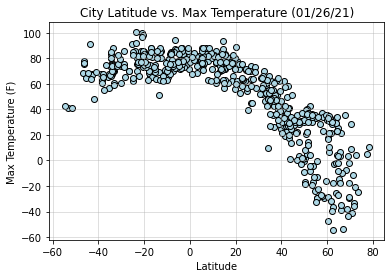

<Figure size 432x288 with 0 Axes>

In [6]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Max Temperature (01/26/21)')
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig("output_data/Lat_Max Temp_scatter.png", dpi=300)

## Latitude vs. Humidity Plot

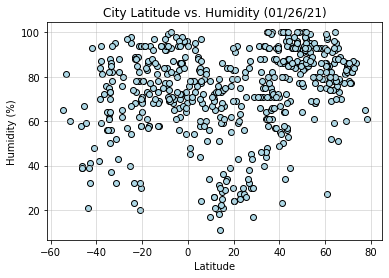

<Figure size 432x288 with 0 Axes>

In [7]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Humidity (01/26/21)')
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig("output_data/Lat_Humidity_scatter.png", dpi=300)

## Latitude vs. Cloudiness Plot

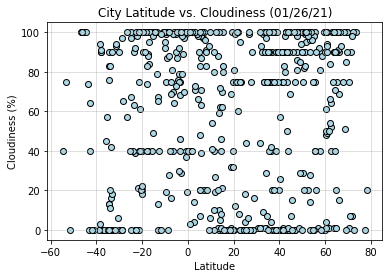

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Cloudiness (01/26/21)')
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig("output_data/Lat_Cloudiness_scatter.png", dpi=300)

## Latitude vs. Wind Speed Plot

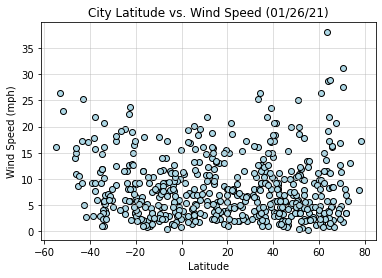

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (01/26/21)')
plt.grid(alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig("output_data/Lat_Wind Speed_scatter.png", dpi=300)

## Linear Regression

In [10]:
# Separate northern and southern hemisphere data
northern_data = weather_data[weather_data['Lat'] >= 0]
southern_data = weather_data[weather_data['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value: 0.7419


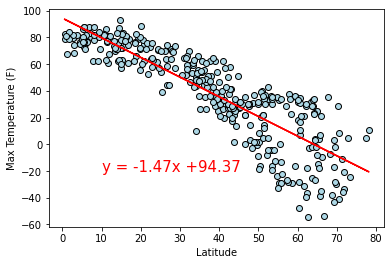

In [12]:
x_values = northern_data['Lat']
y_values = northern_data['Max Temp']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")

# Print r-value
print(f"The r-value: {round(rvalue**2,4)}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value: 0.1732


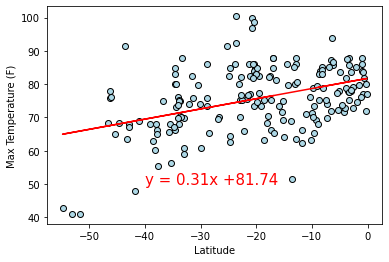

In [14]:
x_values = southern_data['Lat']
y_values = southern_data['Max Temp']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")

# Print r-value
print(f"The r-value: {round(rvalue**2,4)}")

# Show plot
plt.show()

In [15]:
# One would expect that the further the city is away from the equator, the colder the temperatures would be.  
# It is clear to see in the Northern Hemisphere, experiencing winter.
# It is detectable in the Southern Hemisphere, experiencing summer.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value: 0.1705


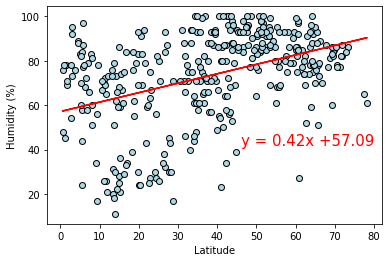

In [18]:
x_values = northern_data['Lat']
y_values = northern_data['Humidity']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(46,42),fontsize=15,color="red")

# Print r-value
print(f"The r-value: {round(rvalue**2,4)}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value: 0.1421


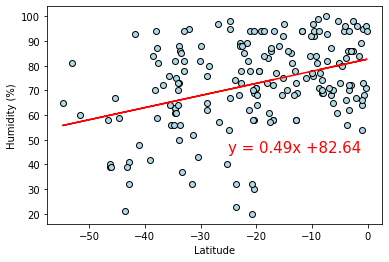

In [20]:
x_values = southern_data['Lat']
y_values = southern_data['Humidity']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")

# Print r-value
print(f"The r-value: {round(rvalue**2,4)}")

# Show plot
plt.show()

In [21]:
# It is somewhat detectable in the Northern Hemisphere, experiencing winter, humidity is increasing moving away from the equator.
# It is somewhat detectable in the Southern Hemisphere, experiencing summer, humidity is increasing moving toward the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value: 0.0244


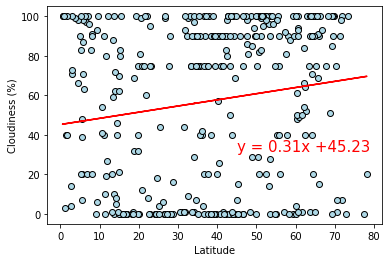

In [23]:
x_values = northern_data['Lat']
y_values = northern_data['Cloudiness']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(45,32),fontsize=15,color="red")

# Print r-value
print(f"The r-value: {round(rvalue**2,4)}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value: 0.0932


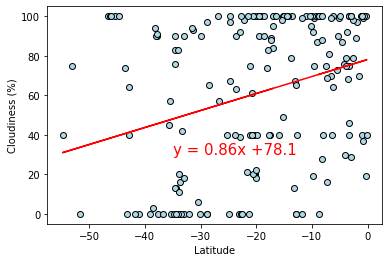

In [26]:
x_values = southern_data['Lat']
y_values = southern_data['Cloudiness']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")

# Print r-value
print(f"The r-value: {round(rvalue**2,4)}")

# Show plot
plt.show()

In [27]:
# Cloudiness reacts somewhat similarly to humidity, given they have meteorological relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value: 0.0002


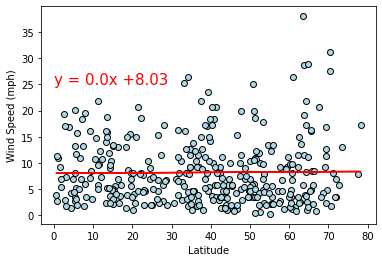

In [30]:
x_values = northern_data['Lat']
y_values = northern_data['Wind Speed']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(0,25),fontsize=15,color="red")

# Print r-value
print(f"The r-value: {round(rvalue**2,4)}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value: 0.1227


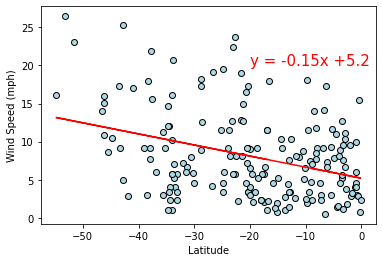

In [32]:
x_values = southern_data['Lat']
y_values = southern_data['Wind Speed']

# Perform a linear regression on max temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

# Print r-value
print(f"The r-value: {round(rvalue**2,4)}")

# Show plot
plt.show()

In [33]:
# In the Northern Hemisphere, experiencing winter, wind speed seems fairly distributed among latitudes. 
# In the Southern Hemisphere, experiencing summer, wind speed seems to decrease moving toward the equator.